#Disease Prediction from Symptoms  ML_CP_TY

The dataset : http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html



##Importing all needed libraries

In [21]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Transforming & Loading the Data

### Loading the Dataset File generated after preprocessing in excel

In [22]:
disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_') # using _ as common splitting delimeter
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group) # refer the data format
        ctr = ctr + 1

    return disease_list

with open("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/raw_data_2.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    
    for row in reader:

        if row[0]!="\xc2\0xa0" and row[0]!="": # for handling file encoding errors
          # saving disease and frequency
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\0xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s) # adding all symptoms
                dict_wt[d] = weight


### Reformatting the data

In [24]:
# saving cleaned data
with open("dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [25]:
columns = ['Source','Target','Weight'] # source: disease, target: symptom, weight: number of cases

In [26]:
data = pd.read_csv("dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [27]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [29]:
data.to_csv("dataset_clean.csv",index=False)

In [30]:
data = pd.read_csv("dataset_clean.csv", encoding ="ISO-8859-1")

In [31]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


First few rows of the dataset:
                 Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

Missing values in each column:
Source    0
Target    3
Weight    0
dtype: int64

Statistical description of the dataset:
            Weight
count  2129.000000
mean    264.826209
std     366.275507
min      42.000000
25%      92.000000
50%     147.000000
75%     294.000000
max    3363.000000


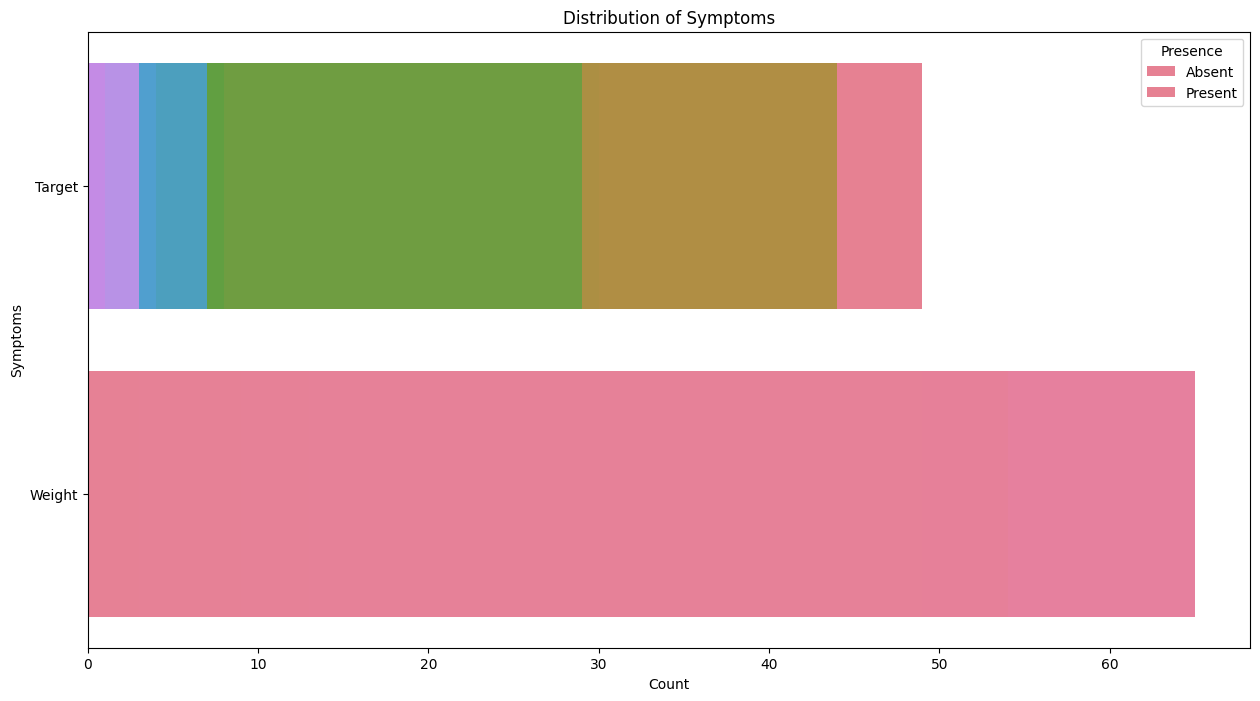

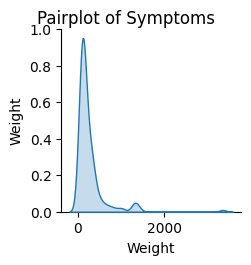

In [32]:
# Importing necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Basic statistical description of the dataset
print("\nStatistical description of the dataset:")
print(data.describe())

# Visualizing the distribution of symptoms
plt.figure(figsize=(15, 8))
sns.countplot(data=data.melt(value_vars=data.columns[1:]), y='variable', hue='value', dodge=False)
plt.title('Distribution of Symptoms')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.legend(title='Presence', loc='upper right', labels=['Absent', 'Present'])
plt.show()

# #REMOVE TEH PROGENESIS COLUMN
# data = data.drop(['Source'], axis=1)
# # Visualizing correlations between symptoms 
# correlation_matrix = data[data.columns[1:]].corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap of Symptoms')
# plt.show()

# Pairplot for some key symptoms 
sns.pairplot(data[data.columns[1:]], diag_kind='kde')
plt.suptitle('Pairplot of Symptoms', y=1.02)
plt.show()


In [33]:
len(data['Source'].unique()) # unique diseases

149

In [34]:
len(data['Target'].unique()) # unique symptoms

405

In [35]:
df = pd.DataFrame(data)

In [36]:
df_1 = pd.get_dummies(df.Target) # 1 hot encoding symptoms

In [37]:
df_1.head()

,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
df.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [39]:
df_s = df['Source']

In [40]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [41]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [42]:
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
len(df_pivoted)

2116

In [44]:
cols = df_pivoted.columns

In [45]:
cols = cols[1:] # removing headings

In [46]:
# visualizing existance of symptoms for diseases
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PneumocystisÃÂ cariniiÃÂ pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accidentÃÂ cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquiredÃÂ immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
len(df_pivoted)

149

In [48]:
df_pivoted.to_csv("df_pivoted.csv")

In [49]:
# defining data for training
x = df_pivoted[cols]
y = df_pivoted['Source']

Loading data...

Starting model evaluation...

Evaluating Naive Bayes...

Results for Naive Bayes:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Cross-validation accuracy: 1.0000 (+/- 0.0000)

Classification Report on Test Data:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken 

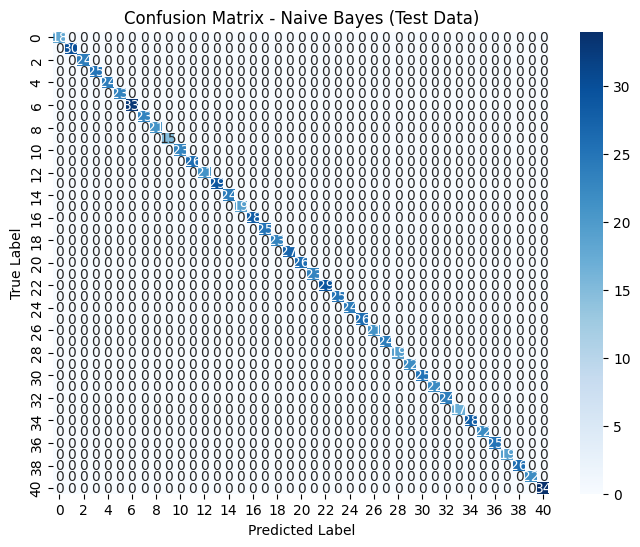


Evaluating Decision Tree...

Results for Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Cross-validation accuracy: 0.9995 (+/- 0.0012)

Classification Report on Test Data:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        

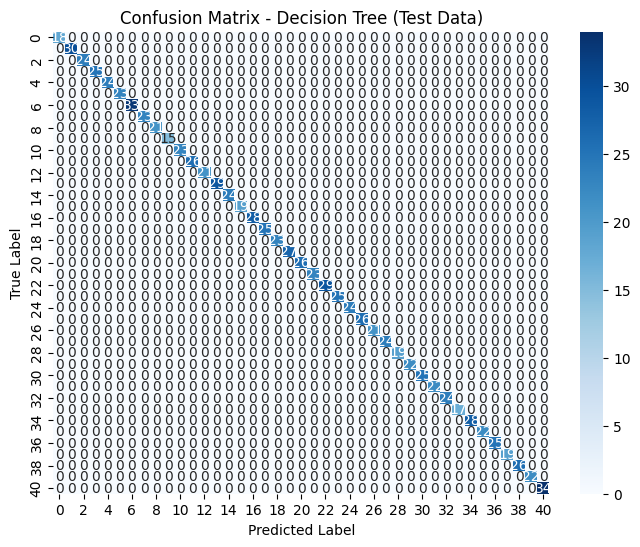


Evaluating Logistic Regression...

Results for Logistic Regression:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Cross-validation accuracy: 1.0000 (+/- 0.0000)

Classification Report on Test Data:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      

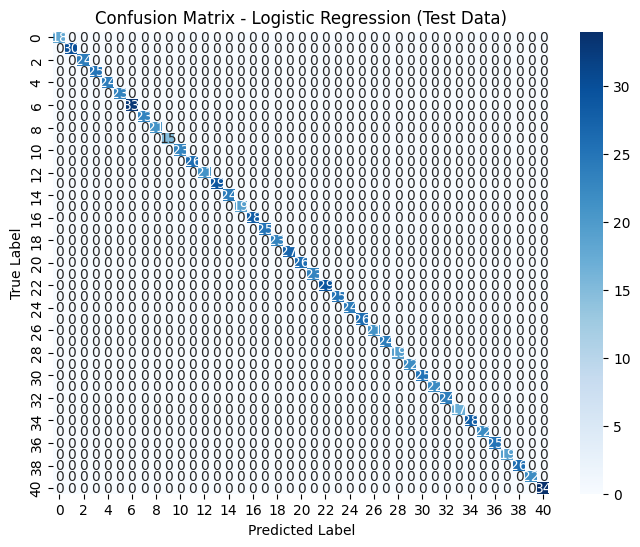


Evaluating Random Forest...

Results for Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Cross-validation accuracy: 1.0000 (+/- 0.0000)

Classification Report on Test Data:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        

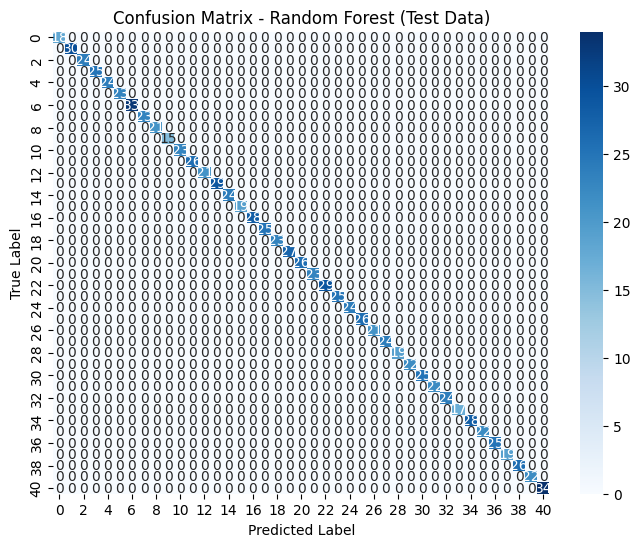


Evaluating Gradient Boosting...


KeyboardInterrupt: 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

def evaluate_models(X, y):
    """
    Evaluate multiple models using proper train-test split and cross-validation
    """
    # First split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform on test data
    
    # Initialize models
    models = {
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'Voting Classifier': VotingClassifier(
            estimators=[
                ('nb', GaussianNB()),
                ('dt', DecisionTreeClassifier(random_state=42)),
                ('lr', LogisticRegression(max_iter=1000, random_state=42))
            ],
            voting='soft'
        )
    }
    
    # Dictionary to store results
    results = {
        'Model': [],
        'Train Accuracy': [],
        'Test Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': [],
        'Cross-Val Score': []
    }
    
    # Evaluate each model
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        
        # Fit the model
        model.fit(X_train_scaled, y_train)
        
        # Get predictions for both train and test sets
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
        
        # Perform cross-validation on training data
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        
        # Store results
        results['Model'].append(name)
        results['Train Accuracy'].append(train_accuracy)
        results['Test Accuracy'].append(test_accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['Cross-Val Score'].append(cv_scores.mean())
        
        # Print detailed results
        print(f"\nResults for {name}:")
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Testing Accuracy: {test_accuracy:.4f}")
        print(f"Cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        print("\nClassification Report on Test Data:")
        print(classification_report(y_test, y_test_pred))
        
        # Plot confusion matrix for test data
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name} (Test Data)')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    
    return pd.DataFrame(results)

def plot_model_comparison(results_df):
    """
    Create visualizations comparing model performance
    """
    # Prepare data for plotting
    metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score']
    
    # Create bar plot
    plt.figure(figsize=(15, 8))
    x = np.arange(len(results_df['Model']))
    width = 0.15
    
    for i, metric in enumerate(metrics):
        plt.bar(x + i * width, results_df[metric], width, label=metric)
    
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x + width * 2, results_df['Model'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Create heatmap of metrics
    plt.figure(figsize=(12, 8))
    metrics_data = results_df[metrics].T
    metrics_data.columns = results_df['Model']
    sns.heatmap(metrics_data, annot=True, fmt='.4f', cmap='YlOrRd')
    plt.title('Model Performance Metrics Heatmap')
    plt.tight_layout()
    plt.show()


    # Load data
print("Loading data...")
data = pd.read_csv('D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv')
    
    # Separate features and target
x = df_pivoted[cols]
y = df_pivoted['Source']
    
print("\nStarting model evaluation...")
    # Evaluate models
results_df = evaluate_models(X, y)
    
print("\nPlotting comparison visualizations...")
    # Plot comparisons
plot_model_comparison(results_df)
    
    # Print final summary
print("\nFinal Summary:")
print("\nBest model by different metrics:")
for metric in ['Test Accuracy', 'Precision', 'Recall', 'F1-Score']:
    best_model = results_df.loc[results_df[metric].idxmax()]
    print(f"\nBest model by {metric}:")
    print(f"Model: {best_model['Model']}")
    print(f"Score: {best_model[metric]:.4f}")
    
    # Check for overfitting
for _, row in results_df.iterrows():
    train_acc = row['Train Accuracy']
    test_acc = row['Test Accuracy']
    if train_acc - test_acc > 0.1:  # If difference is more than 10%
        print(f"\nWarning: Possible overfitting detected in {row['Model']}")
        print(f"Train accuracy: {train_acc:.4f}")
        print(f"Test accuracy: {test_acc:.4f}")
        print(f"Difference: {train_acc - test_acc:.4f}")
    
    # Save results to CSV
results_df.to_csv('model_evaluation_results.csv', index=False)
print("\nResults have been saved to 'model_evaluation_results.csv'")



##Building Model

In [125]:
# importing all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [126]:
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [127]:
# Training multinomial naive bayes
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [128]:
mnb.score(x_test, y_test)

0.0

In [129]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [130]:
mnb_tot.score(x, y)

0.8993288590604027

In [131]:
disease_pred = mnb_tot.predict(x)

In [132]:
disease_real = y.values

In [133]:
# printing model error
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

Pred: HIV Actual:acquiredÃÂ immuno-deficiency syndrome
Pred: biliary calculus Actual:cholelithiasis
Pred: coronary arteriosclerosis Actual:coronary heart disease
Pred: depression mental Actual:depressive disorder
Pred: HIV Actual:hiv infections
Pred: carcinoma breast Actual:malignant neoplasm of breast
Pred: carcinoma of lung Actual:malignant neoplasm of lung
Pred: carcinoma prostate Actual:malignant neoplasm of prostate
Pred: carcinoma colon Actual:malignant tumor of colon
Pred: candidiasis Actual:oralÃÂ candidiasis
Pred: effusion pericardial Actual:pericardial effusion body substance
Pred: malignant neoplasms Actual:primary malignant neoplasm
Pred: sepsis (invertebrate) Actual:septicemia
Pred: sepsis (invertebrate) Actual:systemic infection
Pred: tonic-clonic epilepsy Actual:tonic-clonic seizures


## Using decision trees

In [134]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [135]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.8993288590604027


In [136]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.jpg', 
                feature_names=cols
               )

In [1]:
from IPython.display import Image
Image(filename='tree.jpg')

##Manual Analysis data

In [138]:
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")

In [139]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [140]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [141]:
len(data.columns)

133

In [142]:
len(data['prognosis'].unique())

41

In [143]:
df = pd.DataFrame(data)

In [144]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [145]:
len(df)

4920

In [146]:
cols = df.columns

In [147]:
cols = cols[:-1]

In [148]:
len(cols)

132

In [149]:
x = df[cols]
y = df['prognosis']

In [150]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [151]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

## Building Classifier: Using Multinomial Naive Bayes

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [153]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [154]:
mnb.score(x_test, y_test)

1.0

In [155]:
from sklearn import model_selection
print ("cross result========")
scores = model_selection.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[1. 1. 1.]
1.0


In [156]:
test_data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Testing.csv")

In [157]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Allergy,NaN
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,GERD,NaN
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chronic cholestasis,NaN
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Drug Reaction,NaN


In [158]:
testx = test_data[cols]
testy = test_data['prognosis']

In [159]:
mnb.score(testx, testy)

0.926829268292683

In [160]:
from sklearn import model_selection
print ("cross result========")
scores = model_selection.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[1. 1. 1.]
1.0


##Building Classifier: Using Decision Trees

In [161]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [163]:
print ("DecisionTree")
dt = DecisionTreeClassifier(min_samples_split=20)
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  0.9772167487684729


In [164]:
from sklearn import model_selection
print ("cross result========")
scores = model_selection.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[0.9501845  0.96487985 0.94085028]
0.9519715437450124


In [165]:
print ("Acurracy on the actual test data: ", clf_dt.score(testx,testy))

Acurracy on the actual test data:  0.926829268292683


In [166]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.dot', 
                feature_names=cols)

In [167]:
!dot -Tpng tree.dot -o tree.png

In [168]:
from IPython.display import Image
Image(filename='tree.png')

In [169]:
dt.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
        'dehydration', 'indigestion', 'headache', 'yellowish_skin',
        'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the

##Finding Feature Importances

In [170]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
print(dt.feature_importances_)

[0.02334168 0.00302481 0.02498471 0.         0.00243271 0.0012238
 0.00395335 0.02193344 0.         0.         0.00152805 0.
 0.         0.         0.         0.         0.         0.
 0.         0.02457854 0.         0.         0.02256045 0.
 0.0012222  0.         0.01780753 0.01163056 0.00189618 0.00213161
 0.         0.         0.02188421 0.02427804 0.02338413 0.02759929
 0.         0.         0.         0.         0.         0.02426241
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02697289 0.         0.
 0.         0.         0.00129107 0.         0.         0.
 0.         0.01952879 0.         0.02422582 0.         0.
 0.         0.         0.         0.         0.         0.
 0.02573662 0.         0.         0.         0.         0.02386615
 0.         0.02689515 0.         0.         0.         0.02379571
 0.0012309  0.         0.02473336 0.00154926 0.         0.
 0.00123592 0.0233691  0.         0.02691854 0.         0.02442975
 

In [171]:
indices = np.argsort(importances)[::-1]
print([data.columns[i] for i in indices])

['muscle_pain', 'loss_of_appetite', 'throat_irritation', 'internal_itching', 'hip_joint_pain', 'polyuria', 'inflammatory_nails', 'brittle_nails', 'blood_in_sputum', 'yellow_crust_ooze', 'nodal_skin_eruptions', 'unsteadiness', 'abnormal_menstruation', 'weight_loss', 'prominent_veins_on_calf', 'fluid_overload.1', 'depression', 'lack_of_concentration', 'dark_urine', 'mild_fever', 'neck_pain', 'altered_sensorium', 'slurred_speech', 'movement_stiffness', 'watering_from_eyes', 'belly_pain', 'nausea', 'continuous_feel_of_urine', 'itching', 'rusty_sputum', 'receiving_unsterile_injections', 'patches_in_throat', 'family_history', 'stomach_pain', 'yellowish_skin', 'stomach_bleeding', 'pus_filled_pimples', 'bloody_stool', 'sunken_eyes', 'breathlessness', 'joint_pain', 'dischromic _patches', 'skin_rash', 'shivering', 'scurring', 'dehydration', 'sweating', 'weakness_of_one_body_side', 'red_spots_over_body', 'muscle_wasting', 'chest_pain', 'foul_smell_of urine', 'spinning_movements', 'chills', 'cough

In [172]:
features = cols

In [173]:
for f in range(20):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 97 - muscle_pain (0.048630)
2. feature 35 - loss_of_appetite (0.027599)
3. feature 51 - throat_irritation (0.026973)
4. feature 93 - internal_itching (0.026919)
5. feature 79 - hip_joint_pain (0.026895)
6. feature 105 - polyuria (0.026657)
7. feature 128 - inflammatory_nails (0.025972)
8. feature 72 - brittle_nails (0.025737)
9. feature 118 - blood_in_sputum (0.025126)
10. feature 131 - yellow_crust_ooze (0.025049)
11. feature 2 - nodal_skin_eruptions (0.024985)
12. feature 86 - unsteadiness (0.024733)
13. feature 101 - abnormal_menstruation (0.024652)
14. feature 19 - weight_loss (0.024579)
15. feature 119 - prominent_veins_on_calf (0.024460)
16. feature 117 - fluid_overload.1 (0.024457)
17. feature 95 - depression (0.024430)
18. feature 109 - lack_of_concentration (0.024375)
19. feature 33 - dark_urine (0.024278)
20. feature 41 - mild_fever (0.024262)


In [174]:
export_graphviz(dt, 
                out_file='tree-top5.dot', 
                feature_names=cols,
                max_depth = 5
               )

In [175]:
!dot -Tpng tree-top5.dot -o tree-top5.png

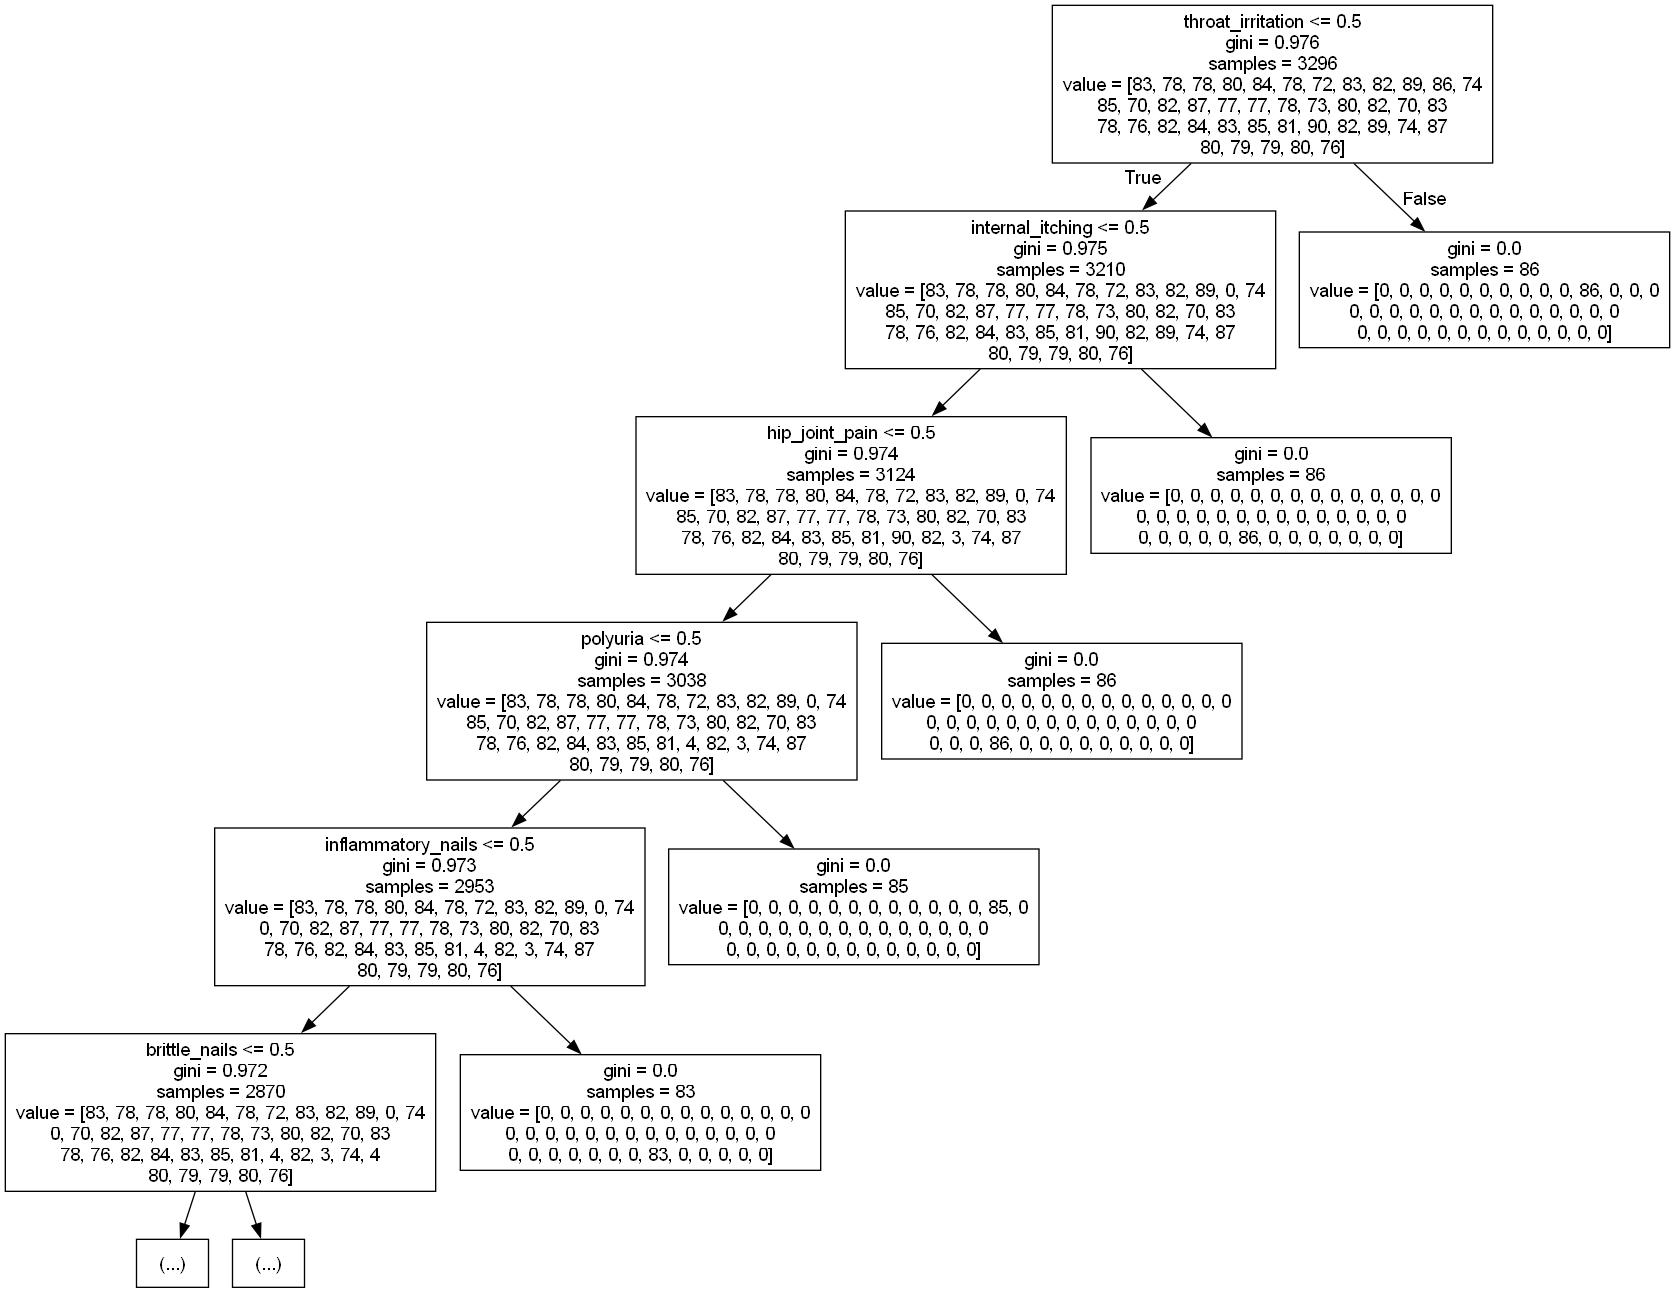

In [176]:
from IPython.display import Image
Image(filename='tree-top5.png')

In [177]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [178]:
feature_dict['internal_itching']

93

In [179]:
sample_x = [i/52 if i==52 else i*0 for i in range(len(features))]
cols = list(data.columns) 
print(cols.index('skin_rash'))

1


This means predicting the disease where the only symptom is redness_of_eyes.

In [180]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [181]:
dt.predict(sample_x)

c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [182]:
dt.predict_proba(sample_x)

c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.        , 0.        , 0.11764706, 0.        ,
        0.11764706, 0.        , 0.11764706, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.17647059, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.17647059, 0.        , 0.        , 0.17647059, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.11764706,
        0.        ]])

In [183]:
len(sample_x)

1

In [184]:
symptoms = ['skin_rash','itching','nodal_skin_eruptions','increased_appetite','irritability']
ipt = [0 for i in range(len(features))]
for s in symptoms:
  ipt[cols.index(s)]=1
ipt = np.array([ipt])
print(ipt)
print(dt.predict(ipt))
dt.predict_proba(ipt)

[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['Fungal infection']


c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)


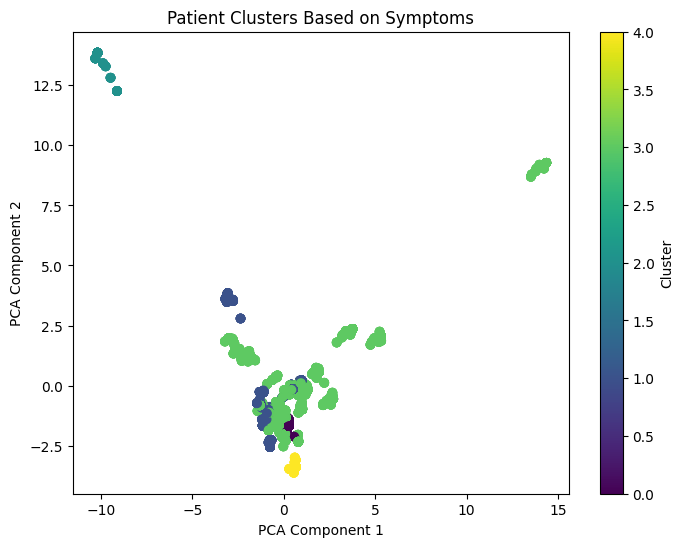

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv')

#drop  column named prognosis
df = df.drop('prognosis', axis=1)


#print column names
cols = df.columns
print(cols)
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust n_clusters based on your dataset
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Patient Clusters Based on Symptoms')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


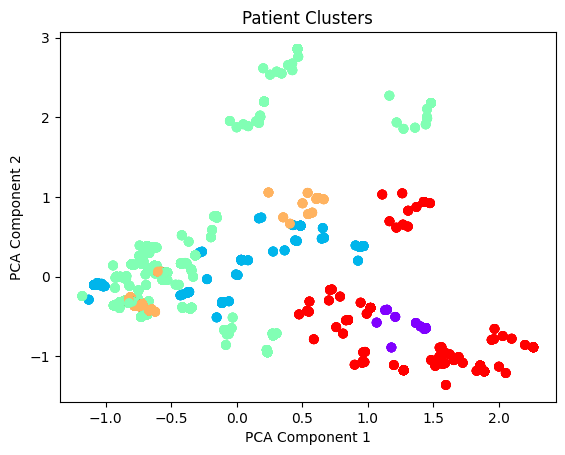

In [201]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")

# Drop the label column if included (like 'prognosis')
X = data.drop('prognosis', axis=1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # choose number of clusters (k)
kmeans.fit(X)

# Add the cluster labels to the data
data['Cluster'] = kmeans.labels_

# Visualize the clustering (2D projection using PCA)
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='rainbow')
plt.title('Patient Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [203]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale the features for DBSCAN
X_scaled = StandardScaler().fit_transform(X)

# Fit DBSCAN (adjust eps and min_samples accordingly)
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

print(data['Cluster_DBSCAN'].value_counts())


Cluster_DBSCAN
216    90
268    90
261    84
291    84
274    78
       ..
138     6
139     6
140     6
141     6
303     6
Name: count, Length: 304, dtype: int64


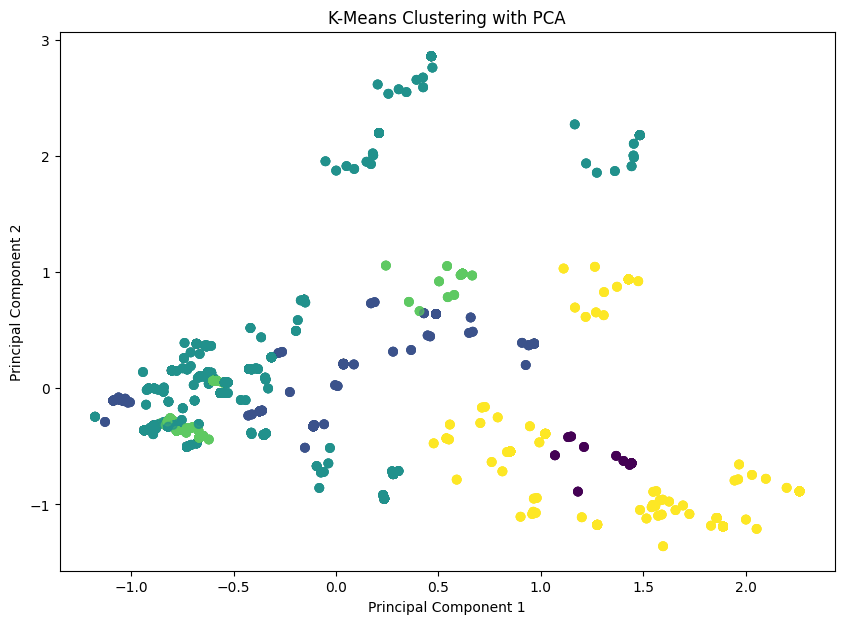

In [207]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Now use X_pca for visualization instead of X
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


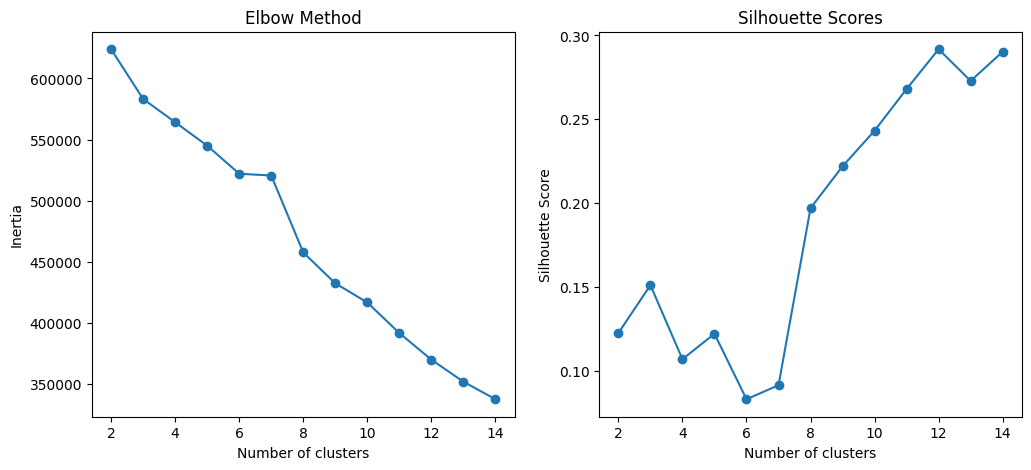

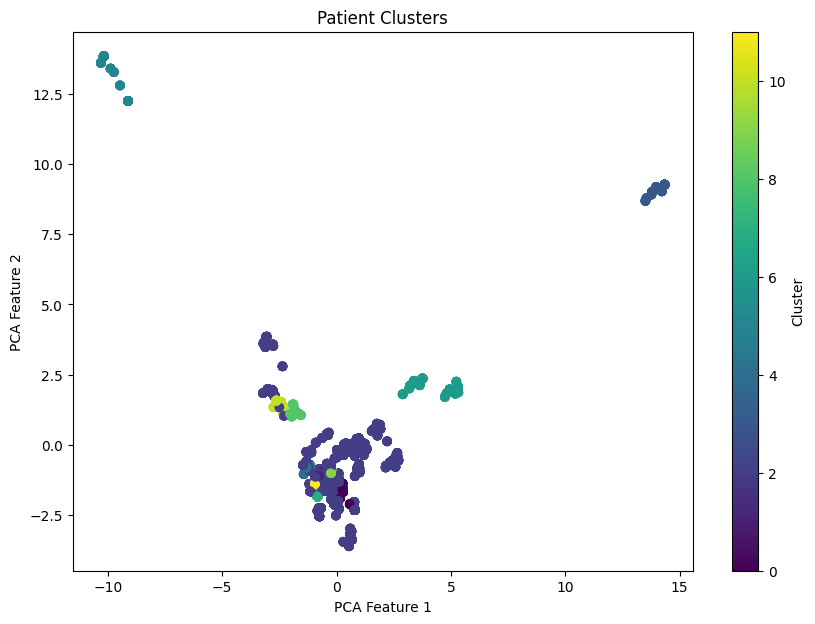

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")

# Drop the label column if included (like 'prognosis')
X = data.drop('prognosis', axis=1)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot the Elbow method and Silhouette score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 15), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()

# Fit the KMeans model with the optimal number of clusters
optimal_k = np.argmax(silhouette_scores) + 2  # Adjust for range starting at 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Save the clustered data to CSV
data.to_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Clustered_data.csv", index=False)

# Visualize clusters (2D projection using PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Patient Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


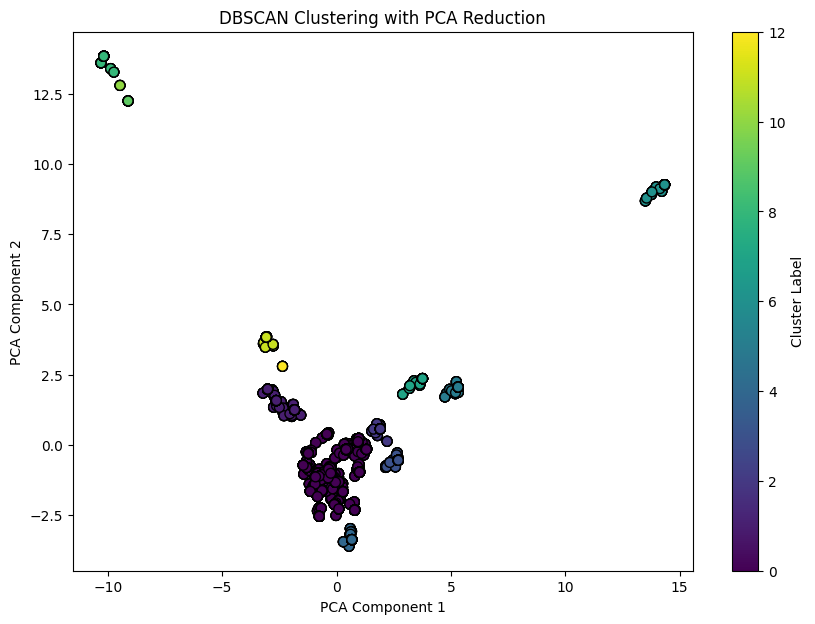

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")
for i in range(len(data.columns)):
    print('"'+data.columns[i]+'"'+',')

# Drop the label column if included (like 'prognosis')
X = data.drop('prognosis', axis=1)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples as needed
clusters = dbscan.fit_predict(pca_result)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Save the clustered data to a new CSV file
data.to_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/DBSCAN_Clustered_data_with_PCA.csv", index=False)

# Visualize the clusters (2D projection)
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering with PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

<Figure size 1500x1000 with 0 Axes>

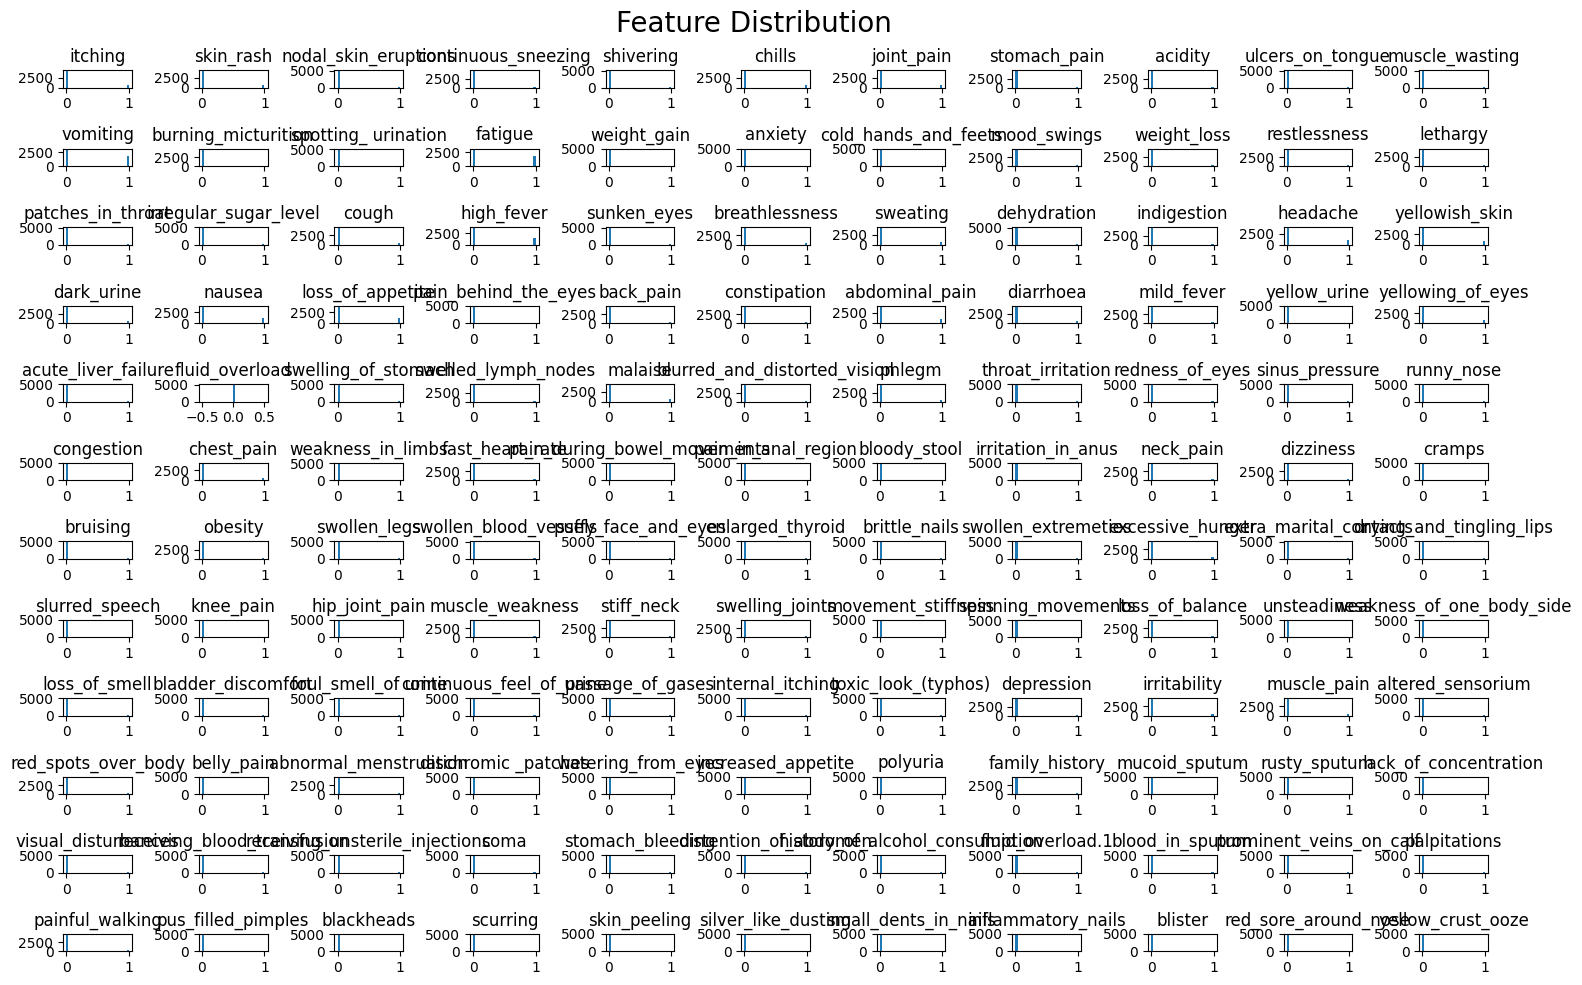

ValueError: could not convert string to float: 'Fungal infection'

<Figure size 1200x800 with 0 Axes>

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of each feature using histograms
plt.figure(figsize=(15, 10))
data.hist(bins=30, figsize=(15, 10), grid=False)
plt.suptitle('Feature Distribution', fontsize=20)
plt.tight_layout()
plt.show()

# Visualize the correlations between features using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# Scatter plot of the first two features
plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.6)
plt.title('Scatter Plot of Feature 1 vs Feature 2', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid()
plt.show()

# Box plot to visualize the spread of features
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop('prognosis', axis=1))  # Exclude the label column
plt.title('Box Plot of Features', fontsize=20)
plt.xticks(rotation=45)
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(data, hue='prognosis', diag_kind='kde', markers='o')
plt.title('Pairplot of Features Colored by Prognosis', fontsize=20)
plt.show()
